In [0]:
fileroot = "clinicaltrial_2021"
import os
os.environ ['fileroot'] = fileroot

In [0]:
# creating a Schema
from pyspark.sql.types import *
mySchema = StructType ([
 StructField("Id", StringType()) ,
 StructField("Sponsor", StringType()) ,
 StructField("Status", StringType()) ,
 StructField("Start", StringType()) ,
 StructField("Completion", StringType()) ,
     StructField("Type", StringType()) ,
     StructField("Submission", StringType()) ,
    StructField("Conditions", StringType()) ,
 StructField("Interventions", StringType())])

In [0]:
Clinicaltrial_df = spark.read.csv("/FileStore/tables/" + fileroot + ".csv", header=True, schema=mySchema, sep="|")
Clinicaltrial_df.show(2)

+-----------+--------------------+----------+--------+----------+--------------+----------+--------------------+-------------+
|         Id|             Sponsor|    Status|   Start|Completion|          Type|Submission|          Conditions|Interventions|
+-----------+--------------------+----------+--------+----------+--------------+----------+--------------------+-------------+
|NCT02758028|The University of...|Recruiting|Aug 2005|  Nov 2021|Interventional|  Apr 2016|                null|         null|
|NCT02751957|     Duke University| Completed|Jul 2016|  Jul 2020|Interventional|  Apr 2016|Autistic Disorder...|         null|
+-----------+--------------------+----------+--------+----------+--------------+----------+--------------------+-------------+
only showing top 2 rows



In [0]:
# To count the numbers of studies in the datatset

from pyspark.sql.functions import countDistinct

NumbersOfStudies = Clinicaltrial_df.select(countDistinct("Id")).collect()[0][0]
print("Number of studies:", NumbersOfStudies)


Number of studies: 387261


In [0]:
# Group by "Type" and count to List all types of studies
Clinicaltrial_df.groupBy("Type").count().orderBy("count", ascending=False).show(truncate=False)

+--------------------------------+------+
|Type                            |count |
+--------------------------------+------+
|Interventional                  |301472|
|Observational                   |77540 |
|Observational [Patient Registry]|8180  |
|Expanded Access                 |69    |
+--------------------------------+------+



In [0]:
# I have to split the conditions colum because i suspected that there are more values in the colum seperated by a comma
from pyspark.sql.functions import split
Clinicaltrial_df1= Clinicaltrial_df.withColumn("Conditions", split(Clinicaltrial_df["Conditions"], ","))

Clinicaltrial_df1.show()

+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|         Id|             Sponsor|              Status|   Start|Completion|                Type|Submission|          Conditions|       Interventions|
+-----------+--------------------+--------------------+--------+----------+--------------------+----------+--------------------+--------------------+
|NCT02758028|The University of...|          Recruiting|Aug 2005|  Nov 2021|      Interventional|  Apr 2016|                null|                null|
|NCT02751957|     Duke University|           Completed|Jul 2016|  Jul 2020|      Interventional|  Apr 2016|[Autistic Disorde...|                null|
|NCT02758483|Universidade Fede...|           Completed|Mar 2017|  Jan 2018|      Interventional|  Apr 2016| [Diabetes Mellitus]|                null|
|NCT02759848|Istanbul Medeniye...|           Completed|Jan 2012|  Dec 2014|       Observational|  Ma

In [0]:
from pyspark.sql.functions import explode, count
#Top 5 conditions
# I have to  explode the conditions column because i suspected that there are more values in the column seperated by a comma
Clinicaltrial_df2 = Clinicaltrial_df1.select(explode(Clinicaltrial_df1["Conditions"]).alias("Conditions"))

#Next, is to group the sickness by its frequency using count 
Clinicaltrial_df3 = Clinicaltrial_df2.groupBy("Conditions").agg(count("*"))

#Now sort by the highest count(1) value
Top_Condt = Clinicaltrial_df3.orderBy(Clinicaltrial_df3["count(1)"].desc()).limit(5)
Top_Condt.show()

+-----------------+--------+
|       Conditions|count(1)|
+-----------------+--------+
|        Carcinoma|   13389|
|Diabetes Mellitus|   11080|
|        Neoplasms|    9371|
| Breast Neoplasms|    8640|
|         Syndrome|    8032|
+-----------------+--------+



In [0]:
dbutils.fs.ls("/FileStore/tables/")



Out[8]: [FileInfo(path='dbfs:/FileStore/tables/FaultDataset.csv', name='FaultDataset.csv', size=1703184, modificationTime=1682001753000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data-1.csv', name='Occupancy_Detection_Data-1.csv', size=50968, modificationTime=1677690222000),
 FileInfo(path='dbfs:/FileStore/tables/Occupancy_Detection_Data.csv', name='Occupancy_Detection_Data.csv', size=50968, modificationTime=1677689201000),
 FileInfo(path='dbfs:/FileStore/tables/account-models/', name='account-models/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts/', name='accounts/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/accounts-1.zip', name='accounts-1.zip', size=5297592, modificationTime=1675602526000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-2.zip', name='accounts-2.zip', size=5297592, modificationTime=1675603540000),
 FileInfo(path='dbfs:/FileStore/tables/accounts-3.zip', name='accounts-3.zip', size=5297592, m

In [0]:
fileroot2 = "pharma"
import os
os.environ ['fileroot2'] = fileroot2


In [0]:
# creating a Schema for Pharma
from pyspark.sql.types import *
myPharmaSchema = StructType ([StructField("Parent_Company", StringType())])

In [0]:
Pharma_df = spark.read.csv("/FileStore/tables/"+fileroot2 +".csv", header=True, schema=myPharmaSchema)
Pharma_df.display(100)

Parent_Company
Abbott Laboratories
Abbott Laboratories Inc.
Abbott Laboratories Inc.
"Abbott Laboratories Puerto Rico, Inc."
Acclarent Inc.
Advanced Medical Optics
"Advanced Neuromodulation Systems, Inc."
Advanced Sterilization Products
"Advanced Sterilization Products, a division of Ethicon Inc."
Alere San Diego Inc.


In [0]:
#Import column function 
from pyspark.sql.functions import col

# Identify columns I want to compare and subtract
Clinicaltrial_df2 = Clinicaltrial_df1.select("Sponsor")
Pharma_df2 = Pharma_df.select("Parent_Company")

#Subtract the colum sides
clinicaltrial_only_df = Clinicaltrial_df2.exceptAll(Pharma_df2)

#group by frequency
clinicaltrial_only_df4 = Clinicaltrial_df2.groupBy("Sponsor").agg(count("*"))

#Now I sorted by the highest count(1) value
Top_Sponsor = clinicaltrial_only_df4.orderBy(clinicaltrial_only_df4["count(1)"].desc()).limit(10)
Top_Sponsor.show()

+--------------------+--------+
|             Sponsor|count(1)|
+--------------------+--------+
|     GlaxoSmithKline|    3378|
|National Cancer I...|    3218|
|         AstraZeneca|    2691|
|              Pfizer|    2645|
|M.D. Anderson Can...|    2414|
|Assistance Publiq...|    2369|
|         Mayo Clinic|    2300|
|Merck Sharp & Doh...|    2243|
|   Assiut University|    2154|
|Novartis Pharmace...|    2088|
+--------------------+--------+



In [0]:
# I spooled out the status and completion column to check the columns 
Clinicaltrial_df6 = Clinicaltrial_df1[['Status', 'Completion']].na.drop(subset=['Status', 'Completion'])
Clinicaltrial_df6. show(3)

+----------+----------+
|    Status|Completion|
+----------+----------+
|Recruiting|  Nov 2021|
| Completed|  Jul 2020|
| Completed|  Jan 2018|
+----------+----------+
only showing top 3 rows



In [0]:
from pyspark.sql.types import IntegerType
from pyspark.sql.functions import when


Clinicaltrial_df7 = Clinicaltrial_df6 \
    .filter(col("Status") == "Completed") \
    .select('Status', split(col('Completion'), ' ')[0].alias('Month'), split(col('Completion'), ' ')[1].alias('Year')) \
    .filter(col('Year') == '2021')\
    .groupBy('Month').count() \
    .withColumnRenamed('count', 'clinical trial') \
    .withColumn('month_num', when(col('Month') == 'Jan', 1) #I had to tie the months to numbers so i can order the result sequentially i.e Jan - Dec
                .when(col('Month') == 'Feb', 2)
                .when(col('Month') == 'Mar', 3)
                .when(col('Month') == 'Apr', 4)
                .when(col('Month') == 'May', 5)
                .when(col('Month') == 'Jun', 6)
                .when(col('Month') == 'Jul', 7)
                .when(col('Month') == 'Aug', 8)
                .when(col('Month') == 'Sep', 9)
                .when(col('Month') == 'Oct', 10)
                .when(col('Month') == 'Nov', 11)
                .when(col('Month') == 'Dec', 12)
                .cast(IntegerType())) \
    .orderBy('month_num')

print("Number of clinical trials:", Clinicaltrial_df7.show())

+-----+--------------+---------+
|Month|clinical trial|month_num|
+-----+--------------+---------+
|  Jan|          1131|        1|
|  Feb|           934|        2|
|  Mar|          1227|        3|
|  Apr|           967|        4|
|  May|           984|        5|
|  Jun|          1094|        6|
|  Jul|           819|        7|
|  Aug|           700|        8|
|  Sep|           528|        9|
|  Oct|           187|       10|
+-----+--------------+---------+

Number of clinical trials: None


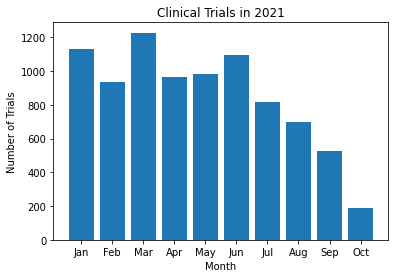

In [0]:
#Visualization
import matplotlib.pyplot as plt

# Convert the DataFrame to a Pandas DataFrame
df = Clinicaltrial_df7.toPandas()

# Create a bar chart
plt.bar(df['Month'], df['clinical trial'])

# X and Y axis
plt.title('Clinical Trials in 2021')
plt.xlabel('Month')
plt.ylabel('Number of Trials')
plt.show()

In [0]:
#Total numbers of studies that were terminated in 2021 and there sponsors

Clinicaltrial_df8 = Clinicaltrial_df1[['Sponsor', 'Completion', 'Status']] \
    .na.drop(subset=['Status', 'Completion']) \
    .filter((col("Status") == "Terminated") & (col("Completion").like("%2021"))) \
    .select('Sponsor') \
    .groupBy('Sponsor').count() \
    .withColumnRenamed('count', 'terminated_trial_count') \
    .orderBy('terminated_trial_count', ascending=False)

Clinicaltrial_df8.show()


+--------------------+----------------------+
|             Sponsor|terminated_trial_count|
+--------------------+----------------------+
|Johns Hopkins Uni...|                     9|
|M.D. Anderson Can...|                     8|
|University of Mic...|                     8|
|Washington Univer...|                     7|
|Merck Sharp & Doh...|                     7|
|University of Ala...|                     6|
| Stanford University|                     6|
|     Yale University|                     6|
|        Galapagos NV|                     6|
|     Gilead Sciences|                     6|
|              Sanofi|                     6|
|National Cancer I...|                     6|
|              Biogen|                     5|
|  NYU Langone Health|                     5|
|         Mayo Clinic|                     5|
|     Duke University|                     5|
|Boston Medical Ce...|                     5|
|Nantes University...|                     4|
|Assistance Publiq...|            